In [1]:

# from google.colab import drive
# drive.mount('/drive')


In [2]:
# from hyperopt import Trials, STATUS_OK, tpe
# from hyperas import optim
# from hyperas.distributions import choice, uniform
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def linear(m,x):
    return m*x

In [3]:
# model.add(Dense(50, activation='linear'))

# # model.add(Dense(50, activation='relu'))
# model.add(Dense(1)) # last layer with 1 neuron
# model.compile(optimizer='rmsprop', loss='mse') # for regression models



# def model(X_train, Y_train, X_val, Y_val):
    
#     model = Sequential()
#     model.add(Dense({{choice([128, 256, 512, 1024])}}, activation={{choice(['relu', 'sigmoid'])}}))
# #     model.add(Activation({{choice(['relu', 'sigmoid'])}}))
#     model.add(Dropout({{uniform(0, 1)}}))
# #     model.add(Dense({{choice([128, 256, 512, 1024])}}))
# #     model.add(Activation({{choice(['relu', 'sigmoid'])}}))
# #     model.add(Dropout({{uniform(0, 1)}}))
    
#     if conditional({{choice(['two', 'three'])}}) == 'three':
#         model.add(Dense({{choice([128, 256, 512, 1024])}}))
#         model.add(Activation({{choice(['relu', 'sigmoid'])}}))
#         model.add(Dropout({{uniform(0, 1)}}))
        
#     model.add(Dense(10))
#     model.add(Activation('softmax'))
#     adam = keras.optimizers.Adam(lr={{choice([10**-3, 10**-2, 10**-1])}})
#     rmsprop = keras.optimizers.RMSprop(lr={{choice([10**-3, 10**-2, 10**-1])}})
#     sgd = keras.optimizers.SGD(lr={{choice([10**-3, 10**-2, 10**-1])}})
   
#     choiceval = {{choice(['adam', 'sgd', 'rmsprop'])}}
#     if choiceval == 'adam':
#         optim = adam
#     elif choiceval == 'rmsprop':
#         optim = rmsprop
#     else:
#         optim = sgd
        
#     model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optim)
#     model.fit(X_train, Y_train,
#               batch_size={{choice([128,256,512])}},
#               nb_epoch=20,
#               verbose=2,
#               validation_data=(X_val, Y_val))
#     score, acc = model.evaluate(X_val, Y_val, verbose=0)
#     print('Test accuracy:', acc)
#     return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [4]:


df = pd.read_excel('/drive/My Drive/Colab Notebooks/data_all.xlsx', sheet_name='data_all')
df = df.append(df)
df = df.append(df)
# df = df.append(df)
df0 =df

print('The shape of our features is:', df.shape)
print(df.columns)
# df = df.iloc[:-3,:]
# print(len(df))
# print(df.tail())
# sns.regplot(x=df['IE_per_mass'],y=df['tot_mass'], fit_reg=False)

# df_filter = df['k1'] < 2
# df = df[df_filter]

# print(df.head())
# df = df[df['k1']]



The shape of our features is: (288, 15)
Index(['D(mm)', 'd(mm)', 'dens', 'sf_pp', 'sf_pw', 'damp', 'J', 'N', 'rpm',
       'Fr', 'torque', 'pp_ie(W)', 'pw_ie(W)', 'gT(1e3)', 'AOR'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split
y = df['gT(1e3)'].values
# y = df['pp_ie(W)'].values + df['pw_ie(W)'].values

df= df.drop('torque', axis = 1)
# df= df.drop('D(mm)', axis = 1)
# df= df.drop('N', axis = 1)
df= df.drop('rpm', axis = 1)
df= df.drop('pp_ie(W)', axis = 1)
df= df.drop('pw_ie(W)', axis = 1)
df= df.drop('gT(1e3)', axis = 1)
df= df.drop('AOR', axis = 1)

# Convert to numpy array
X = df.values


print(df.shape)
print(df.columns)

(288, 9)
Index(['D(mm)', 'd(mm)', 'dens', 'sf_pp', 'sf_pw', 'damp', 'J', 'N', 'Fr'], dtype='object')


In [6]:
# sns.pairplot(df)


In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)


(201, 9)
(87, 9)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [9]:
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Input, Dense

model = Sequential()
# model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))


# model.add(Dense(50, activation='relu'))
model.add(Dense(1)) # last layer with 1 neuron
model.compile(optimizer='adam', loss='mse')
# model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy']) # for regression models
# model.compile(loss='binary_crossentropy',otimizer='adam',metric=['accuray'])


Epoch 1/1200
1/1 [==============================] - 0s 444ms/step - loss: 78.3802
Epoch 2/1200
1/1 [==============================] - 0s 6ms/step - loss: 77.4724
Epoch 3/1200
1/1 [==============================] - 0s 7ms/step - loss: 76.5476
Epoch 4/1200
1/1 [==============================] - 0s 6ms/step - loss: 75.6156
Epoch 5/1200
1/1 [==============================] - 0s 7ms/step - loss: 74.6886
Epoch 6/1200
1/1 [==============================] - 0s 7ms/step - loss: 73.7479
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 72.7772
Epoch 8/1200
1/1 [==============================] - 0s 9ms/step - loss: 71.7821
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 70.7579
Epoch 10/1200
1/1 [==============================] - 0s 9ms/step - loss: 69.6966
Epoch 11/1200
1/1 [==============================] - 0s 12ms/step - loss: 68.5849
Epoch 12/1200
1/1 [==============================] - 0s 12ms/step - loss: 67.4142
Epoch 13/1200
1/1 [============

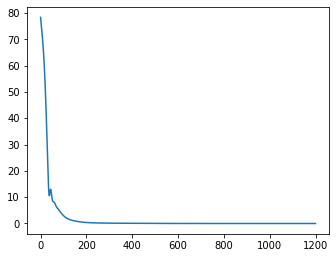

In [10]:
# epochs - number of iterations

# his = model.fit(X, y, validation_split=0.3, epochs=1200, batch_size=len(X_train),verbose=1)
his = model.fit(x=X_train, y=y_train, epochs=1200, batch_size=len(X_train),verbose=1)
print(his.history.keys())


# fig = plt.figure(figsize=(6,4.5))
# ax = fig.add_axes([0.2,0.2,0.7,0.7])
# Summarize history for accuracy
# plt.plot(his.history['accuracy'])
# plt.plot(his.history['val_accuracy'])
# plt.legend(['train, test'], loc='best')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.show()

# Summarize history for loss
# plt.plot(his.history['loss'])
# plt.plot(his.history['val_loss'])
# plt.legend(['train, test'], loc='best')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.show()

# print(len(his.history.epoch))
# epoch = np.arange(0,10,1)
# print(model.history.history['loss'])
# print(his.history['loss'])
# ax.plot(model.history.epoch, his.history['loss'], label='train')
# ax.plot(model.history.epoch, his.history['val_loss'], label='test')

# ax.plot(epoch, his.history['accuracy'], label='train')
# ax.plot(epoch, his.history['val_accuracy'], label='test')

#         ,his.history['val_loss'])

# lg = plt.legend(loc='best')

# fout = "loss2.jpg"
# fig.savefig(fout, dpi=500)

# print(model.history.epoch)
# model.history.validation_data
# val_data = pd.DataFrame(model.history.validation_data);
# model.history.validation_data

loss_df = pd.DataFrame(model.history.history)
fig = plt.figure(figsize=(6,4.5))
ax = fig.add_axes([0.2,0.2,0.7,0.7])
# loss_df.plot()
print(loss_df)
# ax.set_ylim(0,0.4)
ax.plot(model.history.epoch, loss_df['loss'], label='Train')
# ax.plot(model.history.epoch, loss_df['val_loss'], label='Test', alpha=0.5)
# print(model.history)

In [11]:
# Mean squared error of test data (loss)
print("Test MSE ",model.evaluate(X_test, y_test, verbose=0))
# Mean squared error of training data (loss)
print("Train MSE",model.evaluate(X_train, y_train, verbose=0))

# from ann_visualizer.visualize import ann_viz;
# ann_viz(model, title="GOOD")

Test MSE  0.000436262198491022
Train MSE 0.00026316801086068153


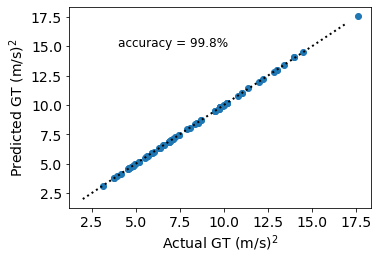

Accuracy: 99.89 %.


In [23]:
import matplotlib.pyplot as plt
# Plot actual and prediction

plt.rc('axes', labelsize=14) #font size of axes label
plt.rc('xtick', labelsize=14) #font size of tick label
plt.rc('ytick', labelsize=14) #font size of tick label


fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])

# ax.set_xlim(0,30)
# ax.set_ylim(0,30)

x = np.arange(2,18,1)
m = 1
y = linear(m, x)


# predictions based on test data
test_predictions = model.predict(X_test)
# Convert numpy array to Pandas series and reshape 
test_predictions = pd.Series(test_predictions.reshape(len(test_predictions),))
# Create a dataframe
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions],axis=1)
# print(pred_df)

pred_df.columns = ['Test True Y', 'Model Predictions']
#sns.pairplot(pred_df)
ax.scatter(pred_df['Test True Y'],pred_df['Model Predictions'])
ax.plot(x,y,color='black', linestyle='dotted',linewidth=2.0, alpha=1)


ax.set_xlabel("Actual GT (m/s)$^{2}$")
ax.set_ylabel("Predicted GT (m/s)$^{2}$") #(10$^{-8}$ ms/kg)"

# ax.text(32, 65, 'accuracy = 98.5%', fontsize=12)
ax.text(4, 15, 'accuracy = 99.8%', fontsize=12)

plt.show()

import os
# save figure
fout = "/drive/My Drive/Colab Notebooks/pred_gT.png"
# fout = os.path.join(path, "shear_RandomForest_k.jpg")
fig.savefig(fout, dpi=300)



# Calculate the absolute errors
errors = abs(pred_df['Test True Y']-pred_df['Model Predictions'])

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / pred_df['Test True Y'])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')







# errors = abs(pred_df['Test True Y']-pred_df['Model Predictions'])
# invalid = errors > 0.05

# count = 0
# for i in range(len(invalid)):
#     if(invalid[i]):
#         count += 1
# print("Invalid %", count/len(invalid))

# actual = np.array(pred_df['Test True Y'])
# pred = np.array(pred_df['Model Predictions'])

# invalid_rows = []
# for i in range(len(pred_df['Test True Y'])):
#     if(actual[i]/pred[i] > 0.1 and actual[i]/pred[i] > 2.2):
#         invalid_rows.append((df0['id'].iloc[i]))

# print(invalid_rows)
# # print(pred_df[invalid])
# print("Valid count",len(actual))
# print("Invalid count",len(invalid_rows))

# delete = df0.drop(df0.index[[2, 4, 5, 10, 13, 14, 15, 16, 22, 23, 26, 28, 30, 59, 62, 63, 65, 72, 75]])
# delete.to_excel('refined2.xlsx')

# print(test_predictions)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# RMS
print("MSE",mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5)

MSE 0.020886848711570927


In [27]:
df_large = pd.read_excel('/drive/My Drive/Colab Notebooks/large_model_data.xlsx', sheet_name='Sheet1')
df_large= df_large.drop('torque', axis = 1)
# df_large= df_large.drop('D(mm)', axis = 1)
# df_large= df_large.drop('N', axis = 1)
df_large= df_large.drop('rpm', axis = 1)
df_large= df_large.drop('pp_ie(W)', axis = 1)
df_large = df_large.drop('pw_ie(W)', axis = 1)
df_large= df_large.drop('gT(1e3)', axis = 1)
df_large= df_large.drop('AOR', axis = 1)

scaler = MinMaxScaler()
scaler.fit(df_large)
new_data = scaler.transform(df_large)

# print(new_data)
predictions = model.predict(new_data)
df = pd.DataFrame(predictions, columns=['gT(1e3)'])
df.to_excel('/drive/My Drive/Colab Notebooks/largemodel_prediction.xlsx')

In [17]:
# If your model is complex and takes a lot of time to train, it is better to save as a hdfs file
#from tensorflow.python.keras.models import load_model

In [18]:
#model.save('my_gem_model.h5')

In [19]:
#later_model = load_model('my_gem_model.h5')

In [20]:
#later_model.predict(new_gem)